### “Обучение с учителем”

Импортируйте библиотеки pandas и numpy.<br><br>
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и Y из этих данных.<br><br>
Разбейте эти датафреймы н а тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.<br><br>
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.<br><br>
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.<br>
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

boston = load_boston()

#boston

In [2]:
x = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=['price'])

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
#x_train

In [5]:
#x_test

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [7]:
lr.fit(x_train, y_train, )

LinearRegression()

In [8]:
y_pred = lr.predict(x_test)
#y_pred

In [9]:
check_test = pd.DataFrame({'y_test': y_test['price'], 
                           'y_pred': y_pred.flatten()},
                          columns=['y_test','y_pred'])
check_test.head(10)


,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [10]:
from sklearn.metrics import r2_score

In [11]:
R2 = r2_score(y_test,y_pred)

In [12]:
R2

0.7112260057484925

In [13]:
y_train.values[:,0]

array([28.7, 21.2, 19.3, 23.1, 19.1, 25. , 33.4,  5. , 29.6, 18.7, 21.7,
       23.1, 22.8, 21. , 48.8, 14.6, 16.6, 27.1, 20.1, 19.8, 21. , 41.3,
       23.2, 20.4, 18.5, 29.4, 36.4, 24.4, 11.8, 13.8, 12.3, 17.8, 33.1,
       26.7, 13.4, 14.4, 50. , 22. , 19.9, 23.8, 17.5, 12.7,  5.6, 31.1,
       26.2, 19.4, 16.7, 13.8, 22.9, 15.3, 27.5, 36.1, 22.9, 24.5, 25. ,
       50. , 34.9, 31.7, 24.1, 22.1, 14.1, 42.8, 19.3, 32.2, 26.4, 21.8,
       21.7,  8.3, 46.7, 43.1, 31.5, 10.5, 16.7, 20. , 33.3, 17.8, 50. ,
       20.5, 23.2, 13.1, 19.6, 22.8, 28.7, 30.7, 22.9, 21.9, 23.9, 32.7,
       24.3, 21.5, 24.6,  8.5, 26.4, 23.1, 15. ,  8.8, 19.3, 23.9, 24.7,
       19.8, 23.8, 13.3, 29. , 27.1, 34.6, 13.3, 15.6, 12.5, 14.6, 11. ,
       24.8, 17.3,  8.1, 21.4, 15.6, 23.3, 32. , 38.7, 30.1, 20.5, 32.5,
       42.3, 24.3, 20.6, 22. , 18.2, 15. ,  6.3, 20.1, 21.4, 28.4, 30.1,
       20.8, 23. , 14.3, 11.7, 37.3, 17.1, 10.4, 23. , 22.7, 20.3, 21.7,
       50. ,  8.4, 18.8, 37.2, 16.1, 16.5, 22.2, 20

### Задание 2<br>
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.<br><br>
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.<br><br>
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель  LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.<br><br>
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.<br>
Напишите в комментариях к коду, какая модель в данном случае работает лучше.<br>


In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,max_depth=12,random_state=42)
model.fit(x_train,y_train.values[:,0])


RandomForestRegressor(max_depth=12, random_state=42)

In [15]:
y_pred = model.predict(x_test)

In [16]:
R2 = r2_score(y_test,y_pred)

In [17]:
R2

0.8713629100115731

In [18]:
y_pred.max()

46.02400000000002

In [19]:
y_test.max()

price    50.0
dtype: float64

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns

def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2_score(true_values, pred_values), 3)))
    print("\n" +"RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n")
    print("MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.plot([0, pred_values.max()+pred_values.max()/100], [0, true_values.max()+true_values.max()/100], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig('report.png')
    plt.show()

R2:	0.871

RMSE:	3.096

MSE:	9.585


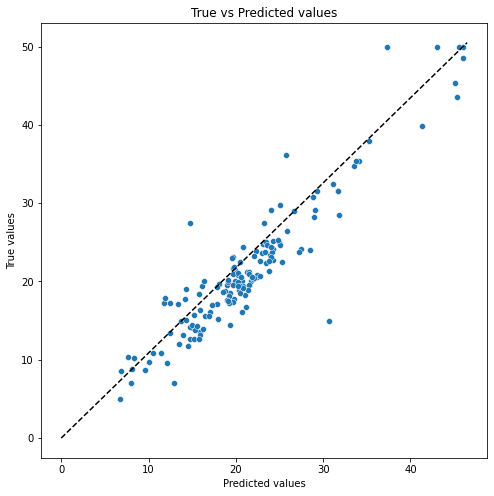

In [21]:
evaluate_preds(y_test['price'],y_pred)

### *Задание 3
Вызовите документацию для класса RandomForestRegressor,<br>
найдите информацию об атрибуте feature_importances_.<br>
С помощью этого атрибута найдите сумму всех показателей важности,<br>
установите, какие два признака показывают наибольшую важность.<br>


In [22]:
? RandomForestRegressor

### Искомая документация
feature_importances_ : ndarray of shape (n_features,)<br>
&nbsp;&nbsp;&nbsp;&nbsp;The impurity-based feature importances.<br>
&nbsp;&nbsp;&nbsp;&nbsp;The higher, the more important the feature.<br>
&nbsp;&nbsp;&nbsp;&nbsp;The importance of a feature is computed as the (normalized)<br>
&nbsp;&nbsp;&nbsp;&nbsp;total reduction of the criterion brought by that feature.  It is also<br>
&nbsp;&nbsp;&nbsp;&nbsp;known as the Gini importance.<br>

#### Поиск всех показателей важности

In [23]:
feature_importances = pd.DataFrame(zip(x_train.columns,
                                       model.feature_importances_ / model.feature_importances_.sum()),
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [24]:
#### Показатели важности

In [25]:
feature_importances

,feature_name,importance
5,RM,0.439920
12,LSTAT,0.380769
7,DIS,0.065599
0,CRIM,0.031561
10,PTRATIO,0.019818
4,NOX,0.012182
9,TAX,0.012047
6,AGE,0.011699
11,B,0.011575
2,INDUS,0.006321


#### Сумма значений показателей важности стремится к 1

In [26]:
feature_importances['importance'].sum()

1.0000000000000002

#### Два наиболле важных показателя

In [27]:
feature_importances.head(2)

,feature_name,importance
5,RM,0.439920
12,LSTAT,0.380769
